# Банки — Анализ оттока клиентов

## Материалы

[Презентация](https://disk.yandex.ru/d/wtT6FCpRrQs7TQ)

**Описание:**

В нашем распоряжении имеются данные о пользователях регионального банка «Метанпромбанк». Целью данного проекта является анализ оттока клиентов для выявления факторов, влияющих на отказ от банковских услуг. Когда мы сформируем сегменты клиентов, склонных к уходу из банка, менеджеры смогут разработать целенаправленные меры по удержанию клиентов и повышению их лояльности.

**Основная задача:** 

* Проведите исследовательский анализ данных, определите все значимые признаки отточности (интервалы значений характеристик, которые связаны с повышенным оттоком, сравните портреты типичных клиентов, которые склонны и не склонны уходить из банка и т.д)
* Сформулируйте и проверьте статистические гипотезы. Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались. Сформулируйте и проверьте статистическую гипотезу относительно представленных данных, которая поможет внести ясность в исследование
* Объединяя признаки отточности, сформируйте сегменты, отберите из них лучшие и дайте по ним рекомендации



**В ходе работы над проектом мы выполним следующие шаги:**

1. Предобработка данных:
  *  Обработка пропусков и дубликатов.
  *  Кодирование данных для дальнейшего анализа.
2. Исследовательский анализ данных:
  *  Сравнение портретов клиентов: Сравнение характеристик и поведения клиентов, склонных и не склонных к оттоку.
  *  Анализ распределений: Изучение распределений переменных, в том числе в разрезе оттока, для выявления значимых закономерностей.
  *  Корреляционный анализ: Оценка взаимосвязей между признаками клиентов, включая признаки, связанные с оттоком.
3. Проверка статистических гипотез:
  *  Проверка гипотезы о различии доходов: Оценка различий в доходах между клиентами, покинувшими банк, и оставшимися.
  *  Формулировка и проверка дополнительной гипотезы: Разработка и проверка гипотезы, которая поможет внести ясность в понимание оттока клиентов на основе имеющихся данных.
4. Сегментация клиентов:
  *  Формирование сегментов: Объединение признаков отточности для формирования сегментов клиентов, склонных к уходу.
  *  Отбор лучших сегментов: Оценка сформированных сегментов и выделение наиболее значимых.
5. Разработка рекомендаций:
  *  Формирование рекомендаций для каждого сегмента.
6. Подготовка презентации

**Данные:**

* `USERID` — идентификатор пользователя;
* `score` — баллы кредитного скоринга;
* `city` — город;
* `gender` — пол;
* `age` — возраст;
* `equity` — количество баллов собственности;
* `balance` — баланс на счёте;
* `products` — количество продуктов, которыми пользуется клиент;
* `credit_card` — есть ли кредитная карта;
* `last_activity` — активный клиент;
* `EST_SALARY` — оценочный доход клиента;
* `сhurn` — признак оттока.

In [1]:
pip install -q missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats as st
import math as mth
import itertools

In [3]:
data = pd.read_csv('/bank_scrooge.csv')

## Общая информация

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


**Вывод:**

В данных имеются пропуски в полях `balance` и `age`. Столбцы `age` и `score`, хранящие целочисленные значения, имеют тип данных `float`. Возможно, в данных есть дубликаты и аномальные значения.

## Подготовка данных

### Анализ пропусков

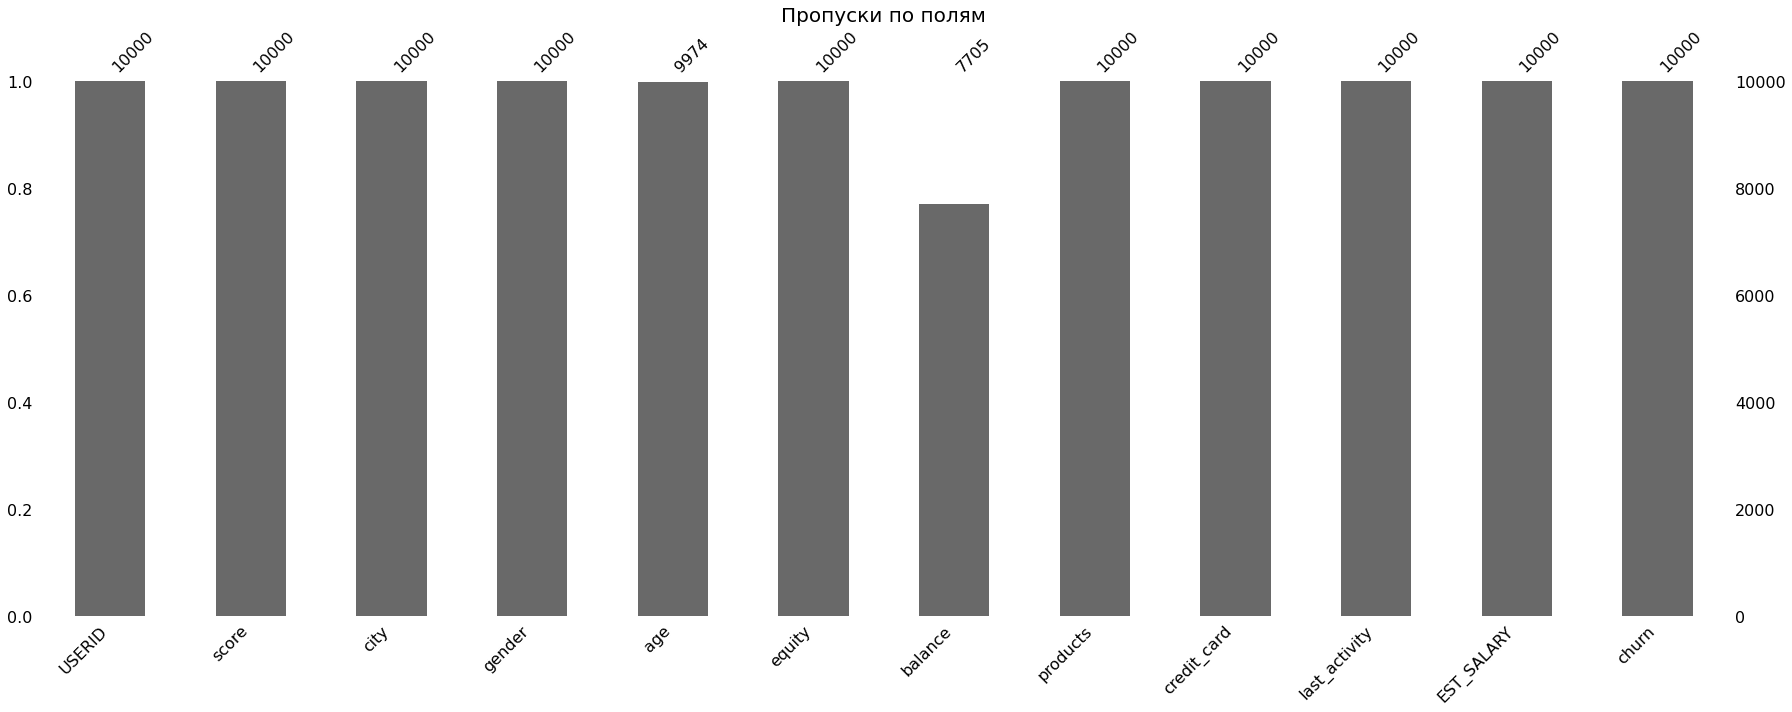

In [7]:
msno.bar(data)

plt.title('Пропуски по полям', fontsize=20)
plt.tight_layout()
plt.show()

In [8]:
print(f'Процент пропусков в поле balance: {data["balance"].isnull().sum() / data["USERID"].count():.0%}')
print(f'Процент пропусков в поле age: {data["age"].isnull().sum() / data["USERID"].count():.1%}')

Процент пропусков в поле balance: 23%
Процент пропусков в поле age: 0.3%


Создадим новое поле, которое будет принимать `1`, если в строке столбца `balance` присутствует пропуск, и `0`, если в строке есть значение. Далее создадим сводную таблицу в разрезе пропусков и посмотрим на меры центральной тенденции, чтобы проследить взаимосвязь.

In [9]:
data['missing'] = data['balance'].isnull().apply(lambda x: 1 if x else 0)

In [10]:
(
    data.pivot_table(
        columns='missing', 
        values=['score', 'age', 'equity', 'products', 'EST_SALARY', 'churn', 'credit_card', 'last_activity'], 
        aggfunc=['mean', 'median'])
)

mean                   median           
missing                    0              1         0          1
EST_SALARY     124501.872366  226310.208654  106222.2  174160.68
age                42.924366      42.093023      40.0      40.00
churn               0.234523       0.005664       0.0       0.00
credit_card         0.640104       0.815686       1.0       1.00
equity              3.395068       0.050980       4.0       0.00
last_activity       0.515769       0.549455       1.0       1.00
products            2.080986       1.162092       2.0       1.00
score             843.739260     865.352070     840.0     903.00

* Средний арифметический оценочный доход клиентов с отсутствием баланса на счёте почти в два раза превышает оценочный доход остальных клиентов.
* Среди этих клиентов практически отсутствуют оттоки, среди них выше доля тех, кто имеет кредитную карту. 
* У них практически отсутствует информация о оценочной собственности.
* В среднем они пользуются только одним продуктом, и у них немного выше баллы кредитного скоринга.

Скорее всего, пропуски в поле `balance` возникли не случайно, их достаточно много. Если мы их удалим, то потеряем `23%` от всех строк. Если заполним, то рискуем сильно исказить картину. Пропуски в этом столбце можно отнести к классу `MNAR`.

Посмотрим подробнее на пользователей с пропусками в поле `age`.

In [11]:
data.query('age.isnull()')

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,missing
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0,1
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0,1
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1,0
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0,1
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0,1
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0,0


Скорее всего, пропуски в этом случае вызваны ошибкой. Если мы удалим их, то потеряем всего приблизительно `0.3%` от всех строк. Здесь пропуски можно отнести к классу `MAR`.

In [12]:
data = data.dropna(subset=['age']).reset_index(drop=True)

**Вывод:**

Подробнее ознакомившись с пропусками, мы выяснили, что:

* Процент пропусков в поле `balance` составляет `23%`.
* Процент пропусков в поле `age` составляет `0.3%`.

В первом случае пропуски, скорее всего, возникли не случайно и относятся к классу `MNAR`, поэтому мы их оставили. Во втором случае пропуски, скорее всего, вызваны какой-то ошибкой и относятся к классу `MAR`, поэтому мы их удалили.

### Анализ дубликатов

Посмотрим на количество дубликатов по полю `USERID` со всеми вхождениями.

In [13]:
data['USERID'].duplicated(keep=False).sum()

100

In [14]:
data_dupl = data.query('USERID.duplicated(keep=False)').sort_values('USERID')
data_dupl

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,missing
1892,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1,0
7683,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0,1
4862,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1,0
7531,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0,1
5856,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,220816,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0,0
2594,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1,0
4212,226719,903.0,Рыбинск,Ж,63.0,0,NaN,1,1,0,138582.58,0,1
8192,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1,0


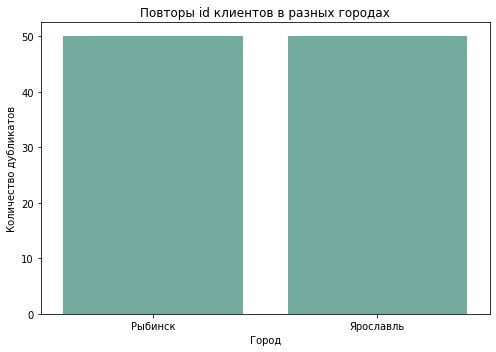

In [15]:
data_dupl_bar = data_dupl.groupby(
    'city', 
    as_index=False).agg(
    {'USERID' : 'count'})

plt.figure(figsize=(7, 5))

sns.barplot(
    y="USERID", 
    x="city", 
    data=data_dupl_bar,  
    color='#69b3a2')

plt.ylabel('Количество дубликатов')
plt.xlabel('Город')
plt.title('Повторы id клиентов в разных городах')
plt.tight_layout()
plt.show()

In [16]:
data[['USERID', 'city']].duplicated(keep=False).sum()

0

**Вывод:**

Некоторые разные клиенты банка из `Рыбинска` имеют такой же `user id`, как и клиенты из `Ярославля`. Поэтому оставим дубликаты как есть.

### Кодирование данных

In [17]:
for i in data['city'].unique():
    data[i] = (data[['city']] == i).astype(int)

In [18]:
for i in data['gender'].unique():
    data['gender_' + i] = (data[['gender']] == i).astype(int)

In [19]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,missing,Рыбинск,Ярославль,Ростов,gender_Ж,gender_М
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1,1,0,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,0,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,0,1


### Анализ аномальных значений

В датасете представлены только текущие клиенты, а это значит, что клиент должен пользоваться минимум одним продуктом банка. Посмотрим, есть ли клиенты, которые не пользуются ни одним из продуктов банка.

In [20]:
data['products'].unique()

array([2, 3, 1, 4, 5, 0])

In [21]:
data.query('products == 0')

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,missing,Рыбинск,Ярославль,Ростов,gender_Ж,gender_М
8939,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,1,1,0,0,1,0


Скорее всего, это уже не активный клиент банка, которого ещё не убрали из базы данных. Удалим его из датафрейма.

In [22]:
data = data.query('products != 0')

Посмотрим встречаются ли аномальные значения в данных

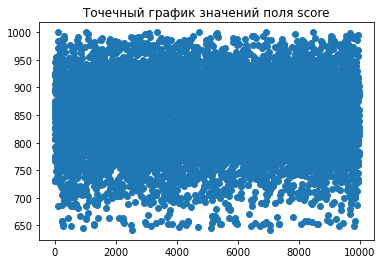

95-й и 99-й перцентили: [946. 978.]


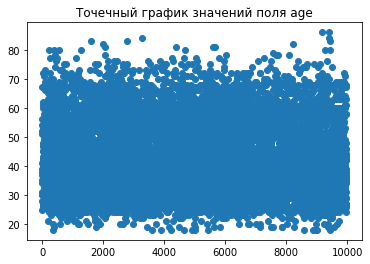

95-й и 99-й перцентили: [65. 73.]


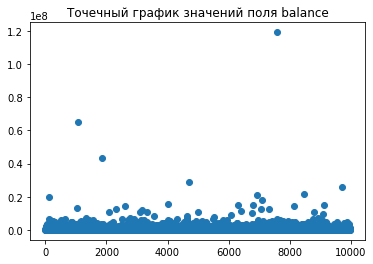

95-й и 99-й перцентили: [2114078.394 4827211.159]


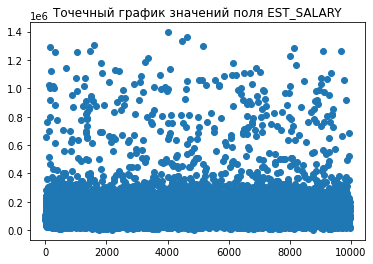

95-й и 99-й перцентили: [316366.936  886343.7136]


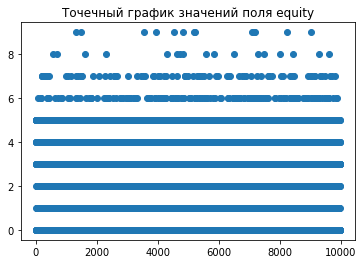

95-й и 99-й перцентили: [5. 7.]


In [23]:
for i in ('score', 'age', 'balance', 'EST_SALARY', 'equity'):
    x_values = pd.Series(range(0, len(data[i])))
    plt.scatter(x_values, data[i])
    plt.title(f'Точечный график значений поля {i}')
    plt.show()
    print('95-й и 99-й перцентили:', np.nanpercentile(data[i], [95, 99]))

Аномалии в данных отсутствуют, за исключением поля `balance`. Однако у менее `1%` клиентов на счёте действительно может быть сумма более `5 миллионов`. Даже наличие `120 миллионов` на счёте у одного из пользователей не выглядит чем-то необычным для представления о клиентах банков. Оставим данные как есть.

**Вывод:**

Проанализировав данные на наличие аномалий, мы выяснили, что один из клиентов, скорее всего, на данный момент уже не является клиентом банка. Других аномалий обнаружено не было.

### Преобразование данных

In [24]:
data = data.rename(columns={'USERID' : 'user_id',
                            'EST_SALARY' : 'est_salary',
                            'Рыбинск' : 'rybinsk_city',
                            'Ярославль' : 'yaroslavl_city',
                            'Ростов' : 'rostov_city',
                            'gender_Ж' : 'female',
                            'gender_М' : 'male'})

In [25]:
data['age'], data['score'] = data['age'].astype('int'), data['score'].astype('int')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9973
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         9973 non-null   int64  
 1   score           9973 non-null   int64  
 2   city            9973 non-null   object 
 3   gender          9973 non-null   object 
 4   age             9973 non-null   int64  
 5   equity          9973 non-null   int64  
 6   balance         7695 non-null   float64
 7   products        9973 non-null   int64  
 8   credit_card     9973 non-null   int64  
 9   last_activity   9973 non-null   int64  
 10  est_salary      9973 non-null   float64
 11  churn           9973 non-null   int64  
 12  missing         9973 non-null   int64  
 13  rybinsk_city    9973 non-null   int64  
 14  yaroslavl_city  9973 non-null   int64  
 15  rostov_city     9973 non-null   int64  
 16  female          9973 non-null   int64  
 17  male            9973 non-null   i

### Вывод

* В ходе подготовки данных к дальнейшему анализу мы выяснили, что пропуски в поле `balance`, скорее всего, не случайны. Мы удалили пропуски в поле `age`. 

* Провели анализ дубликатов по полю `user_id` и выяснили, что некоторые клиенты из `Рыбинска` и `Ярославля` имеют одинаковый ID, но являются разными клиентами.

* Провели кодирование категориальных переменных, добавив тем самым в датафрейм 5 новых полей. 

* Удалили из датафрейма клиента, который, скорее всего, на данный момент уже не являлся клиентом банка. 

* Привели названия полей к единому стилю и изменили типы данных в полях `age` и `score`.

## Исследовательский анализ

###  Распределение данных

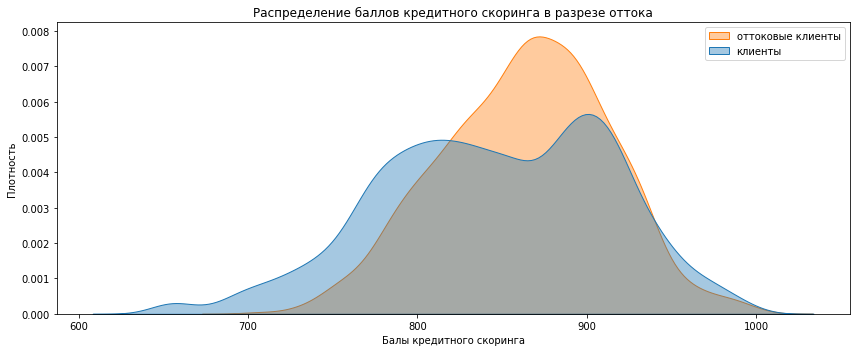

In [27]:
plt.figure(figsize=(12, 5))

sns.kdeplot(data=data, 
            x="score", 
            hue="churn", 
            fill=True, 
            common_norm=False, 
            alpha=0.4)

plt.title('Распределение баллов кредитного скоринга в разрезе оттока')
plt.xlabel('Балы кредитного скоринга')
plt.ylabel('Плотность')
plt.legend(['оттоковые клиенты', 'клиенты'])
plt.tight_layout()
plt.show()

**Вывод:**

В основном баллы кредитного скоринга клиентов распределены между приблизительно `750` и `950`. Большая часть баллов оттоковых клиентов находится между приблизительно `820` и `930`.

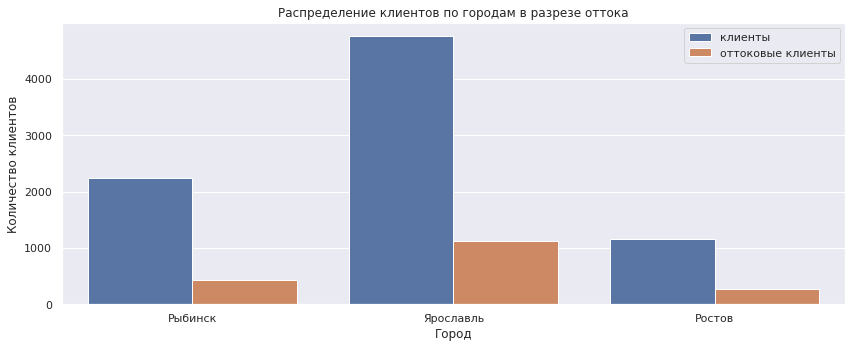

In [28]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(12, 5))

sns.countplot(x="city", 
              hue="churn", 
              data=data)

plt.title('Распределение клиентов по городам в разрезе оттока')
plt.xlabel('Город')
plt.ylabel('Количество клиентов')
plt.legend(['клиенты', 'оттоковые клиенты'])
plt.tight_layout()
plt.show()

Посчитаем долю оттока для каждого города.

In [29]:
city = data.pivot_table(
    columns=['rybinsk_city', 
             'yaroslavl_city', 
             'rostov_city'], 
    values='churn', 
    aggfunc='mean')

city.columns = ['Ростов', 'Ярославль', 'Рыбинск']
city

,Ростов,Ярославль,Рыбинск
churn,0.187147,0.190128,0.162565


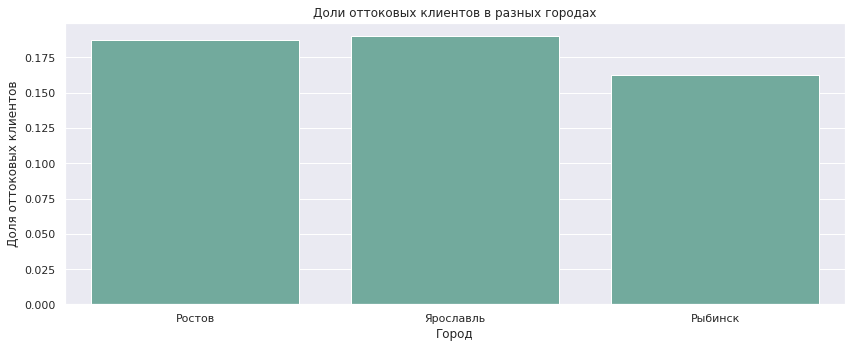

In [30]:
plt.figure(figsize=(12, 5))

sns.barplot(
    data=city,  
    color='#69b3a2')

plt.ylabel('Доля оттоковых клиентов')
plt.xlabel('Город')
plt.title('Доли оттоковых клиентов в разных городах')
plt.tight_layout()
plt.show()

**Вывод:**

Наибольшее количество клиентов находится в `Ярославле`. Доля оттока в `Ярославле` и `Ростове` приблизительно одинаковая. В `Рыбинске` она ниже примерно на `2,5%` - `3%`, чем в `Ростове` или `Ярославле`.

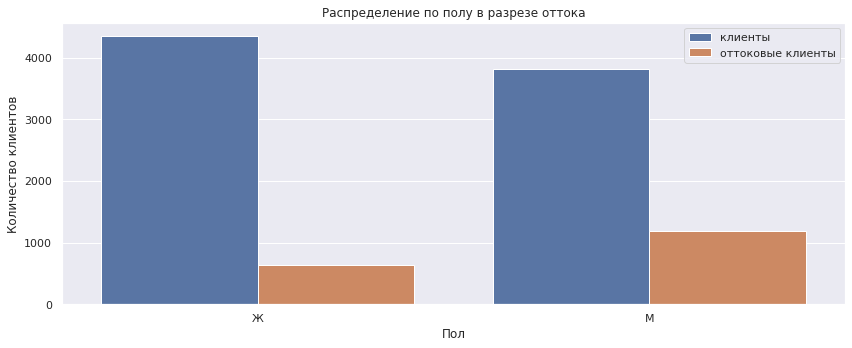

In [31]:
plt.figure(figsize=(12, 5))

sns.countplot(x="gender", 
              hue="churn", 
              data=data)

plt.title('Распределение по полу в разрезе оттока')
plt.ylabel('Количество клиентов')
plt.xlabel('Пол')
plt.legend(['клиенты', 'оттоковые клиенты'])
plt.tight_layout()
plt.show()

In [32]:
print('Распределение по полу:')
print(data.groupby('gender').agg({'gender' : 'count'}))
gen_der = data.pivot_table(
    columns=['female', 
             'male'], 
    values='churn', 
    aggfunc='mean')
print('Доля оттока в разрезе пола:')
gen_der.columns = ['мужчины', 'женщины']
print(gen_der)

Распределение по полу:
        gender
gender        
Ж         4982
М         4991
Доля оттока в разрезе пола:
        мужчины   женщины
churn  0.237027  0.127459


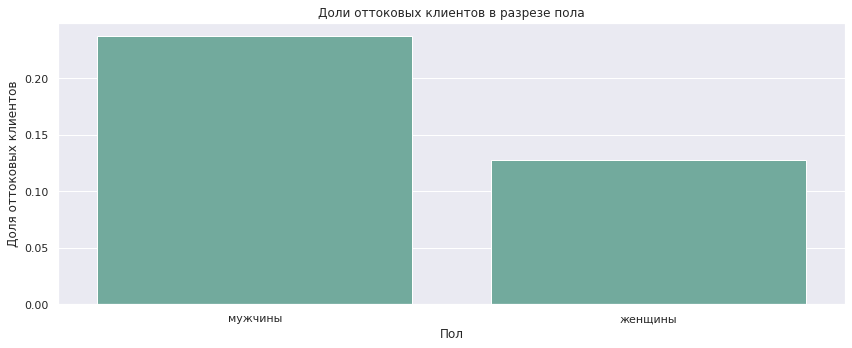

In [33]:
plt.figure(figsize=(12, 5))

sns.barplot(
    data=gen_der,  
    color='#69b3a2')

plt.ylabel('Доля оттоковых клиентов')
plt.xlabel('Пол')
plt.title('Доли оттоковых клиентов в разрезе пола')
plt.tight_layout()
plt.show()

**Вывод:**

В данных `мужчины` и `женщины` представлены практически в одинаковом количестве, однако `мужчины` чаще склонны к оттоку, чем `женщины`. Если среди `женщин` оттоковых клиентов примерно `13%`, то среди `мужчин` их около `24%`.

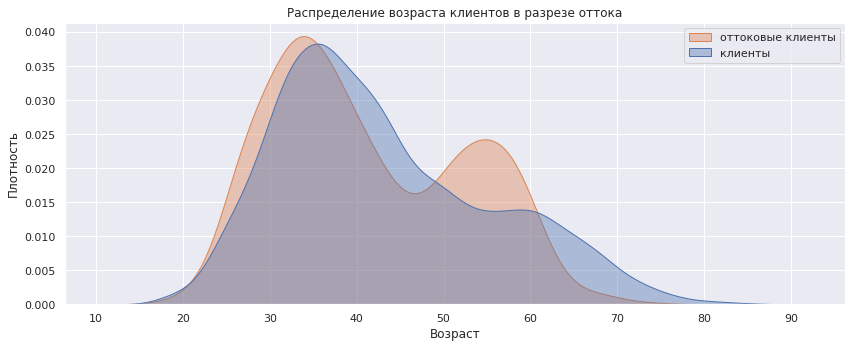

In [34]:
plt.figure(figsize=(12, 5))

sns.kdeplot(data=data, 
            x="age", 
            hue="churn", 
            fill=True, 
            common_norm=False, 
            alpha=0.4)

plt.title('Распределение возраста клиентов в разрезе оттока')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend(['оттоковые клиенты', 'клиенты'])
plt.tight_layout()
plt.show()

**Вывод:**

Основная масса клиентов находится в возрастном диапазоне приблизительно `от 23 до 70 лет`. Чуть больше остальных к оттоку склонны клиенты в возрасте приблизительно `от 25 до 32 лет`. Наиболее склонными к оттоку являются клиенты в возрасте `от 50 до 60 лет`, а наименее — приблизительно `старше 61 года`.

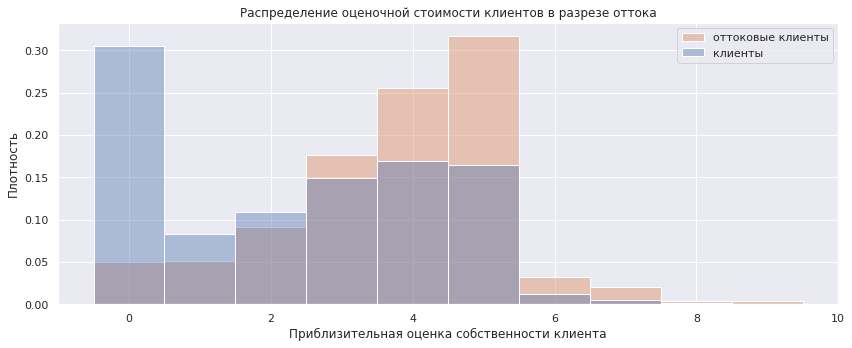

In [35]:
plt.figure(figsize=(12, 5))
sns.histplot(data=data, 
             x='equity', 
             hue="churn", 
             common_norm=False, 
             alpha=0.4, 
             discrete=True, 
             stat='density')

plt.title('Распределение оценочной стоимости клиентов в разрезе оттока')
plt.xlabel('Приблизительная оценка собственности клиента')
plt.ylabel('Плотность')
plt.legend(['оттоковые клиенты', 'клиенты'])
plt.tight_layout()
plt.show()

Построим сводную таблицу с долями оттока для каждой категории и отсортируем её по возрастанию.

In [36]:
equity_df =(
    data.pivot_table(
        columns=['equity'], 
        values='churn', 
        aggfunc='mean'
    ).sort_values(
        'churn', 
        axis=1)
)
equity_df

equity,0,1,2,3,4,5,8,6,7,9
churn,0.034938,0.12031,0.157945,0.208442,0.251218,0.300783,0.352941,0.360248,0.4625,0.538462


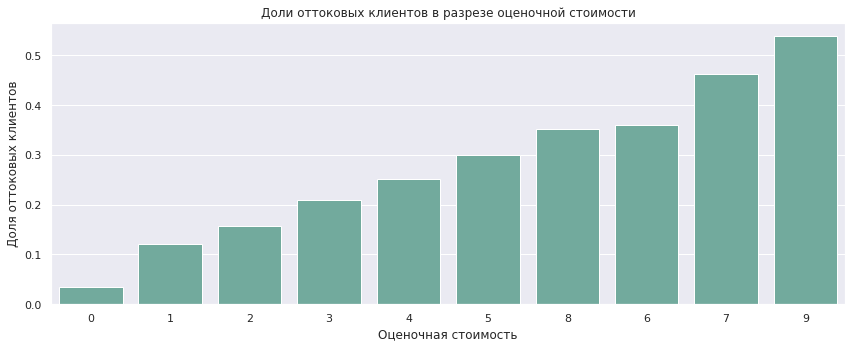

In [37]:
plt.figure(figsize=(12, 5))

sns.barplot(
    data=equity_df,  
    color='#69b3a2')

plt.ylabel('Доля оттоковых клиентов')
plt.xlabel('Оценочная стоимость')
plt.title('Доли оттоковых клиентов в разрезе оценочной стоимости')
plt.tight_layout()
plt.show()

**Вывод:**

`Наибольшее число клиентов с оценочной стоимостью 5`, из них `примерно 30% оттоковые`. Наиболее оттоковыми клиентами являются клиенты с оценочной стоимостью `7 и 9 — примерно 46% и 54% соответственно`. Наименее оттоковые клиенты — это клиенты с `оценочной стоимостью 0 (3%), 1 (12%) и 2 (16%)`. Прослеживается тенденция: чем выше оценочная стоимость, тем больше отток клиентов.

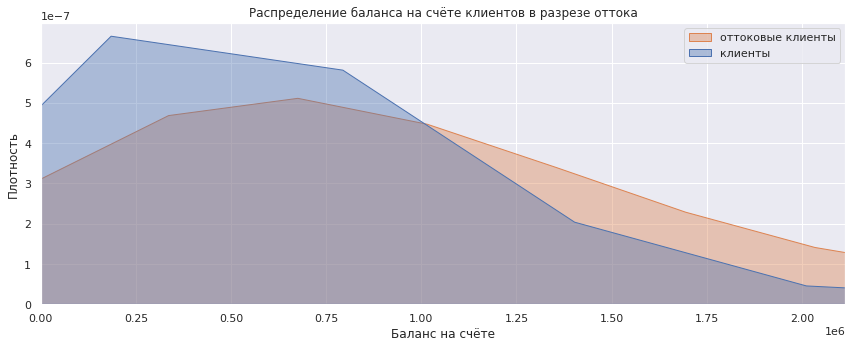

In [38]:
plt.figure(figsize=(12, 5))

sns.kdeplot(data=data, 
            x="balance", 
            hue="churn", 
            fill=True, 
            common_norm=False, 
            alpha=0.4)

plt.title('Распределение баланса на счёте клиентов в разрезе оттока')
plt.xlabel('Баланс на счёте')
plt.ylabel('Плотность')
plt.legend(['оттоковые клиенты', 'клиенты'])
plt.gca().set_xlim(0, 2114079)
plt.tight_layout()
plt.show()

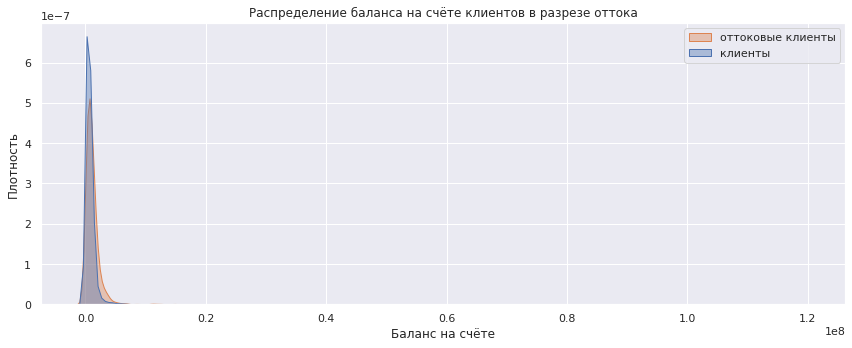

In [39]:
plt.figure(figsize=(12, 5))

sns.kdeplot(data=data, 
            x="balance", 
            hue="churn", 
            fill=True, 
            common_norm=False, 
            alpha=0.4)

plt.title('Распределение баланса на счёте клиентов в разрезе оттока')
plt.xlabel('Баланс на счёте')
plt.ylabel('Плотность')
plt.legend(['оттоковые клиенты', 'клиенты'])
plt.tight_layout()
plt.show()

**Вывод:**

`95%` клиентов имеют баланс на счёте от `0 до приблизительно 2 110 000`. Наиболее заметный отток наблюдается среди клиентов, у которых на счёте более `1 миллиона`.

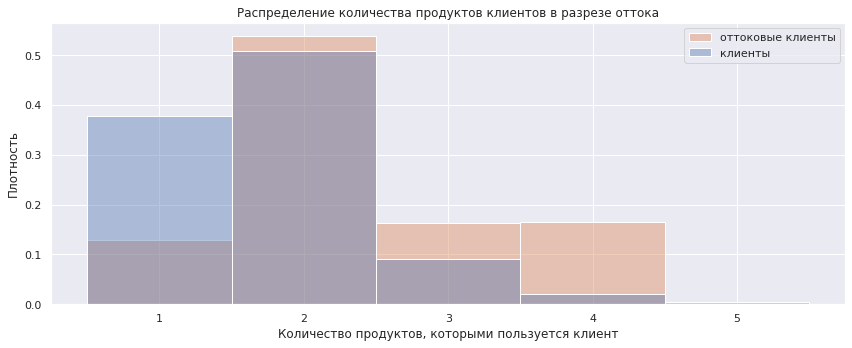

In [40]:
plt.figure(figsize=(12, 5))
sns.histplot(data=data, 
             x='products', 
             hue="churn", 
             common_norm=False, 
             alpha=0.4, 
             discrete=True, 
             stat='density')

plt.title('Распределение количества продуктов клиентов в разрезе оттока')
plt.xlabel('Количество продуктов, которыми пользуется клиент')
plt.ylabel('Плотность')
plt.legend(['оттоковые клиенты', 'клиенты'])
plt.tight_layout()
plt.show()

In [41]:
products_df = (
    data.pivot_table(
        columns=['products'], 
        values='churn', 
        aggfunc='mean')
    .sort_values(
        'churn', 
        axis=1)
)
products_df

products,1,2,3,5,4
churn,0.070719,0.191053,0.286127,0.421053,0.632911


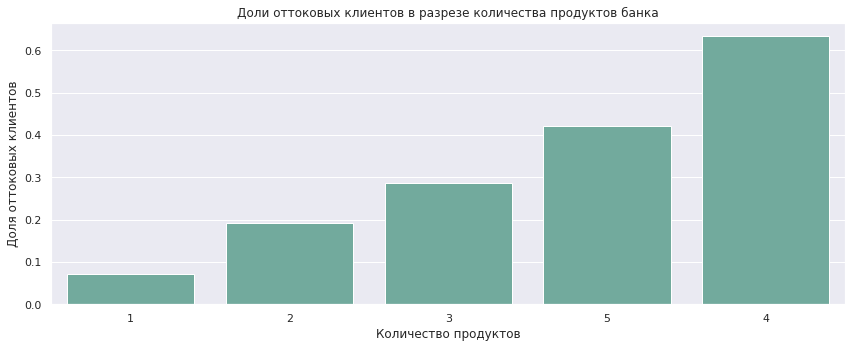

In [42]:
plt.figure(figsize=(12, 5))
sns.barplot(
    data=products_df,  
    color='#69b3a2')

plt.ylabel('Доля оттоковых клиентов')
plt.xlabel('Количество продуктов')
plt.title('Доли оттоковых клиентов в разрезе количества продуктов банка')
plt.tight_layout()
plt.show()

**Вывод:**

В основном клиенты имеют `2 продукта`, и на них приходится около `19% оттоковых клиентов`. Далее идут `клиенты с 1 продуктом`, на которых приходится `около 7% оттоковых клиентов`. Наибольший отток наблюдается среди клиентов, пользующихся `4 продуктами 63%`.

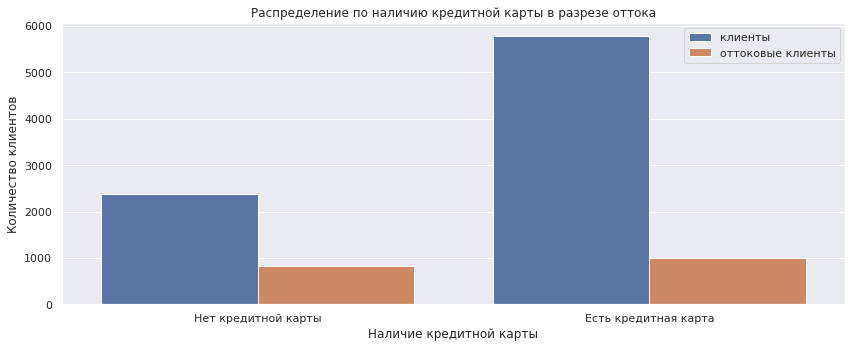

In [43]:
plt.figure(figsize=(12, 5))

sns.countplot(x="credit_card", 
              hue="churn", 
              data=data)

plt.title('Распределение по наличию кредитной карты в разрезе оттока')
plt.ylabel('Количество клиентов')
plt.xlabel('Наличие кредитной карты')
plt.legend(['клиенты', 'оттоковые клиенты'])
plt.xticks([0, 1], ['Нет кредитной карты', 'Есть кредитная карта'])
plt.tight_layout()
plt.show()

In [44]:
credit_card_df = (
    data.pivot_table(
        columns=['credit_card'], 
        values='churn', 
        aggfunc='mean')
    .sort_values(
        'churn', 
        axis=1)
)
credit_card_df

credit_card,1,0
churn,0.147848,0.255566


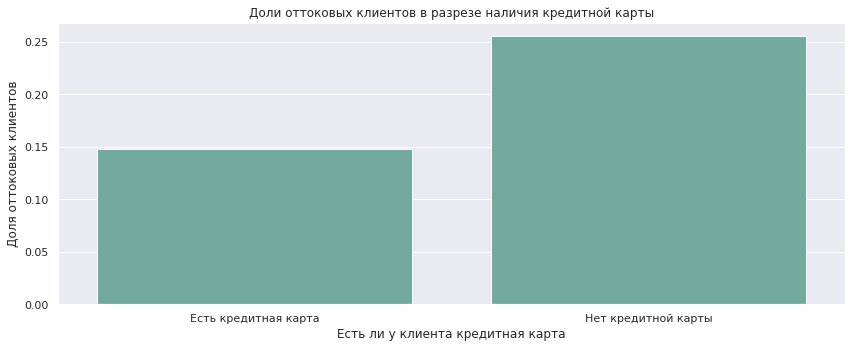

In [45]:
plt.figure(figsize=(12, 5))
sns.barplot(
    data=credit_card_df,  
    color='#69b3a2')

plt.ylabel('Доля оттоковых клиентов')
plt.xlabel('Есть ли у клиента кредитная карта')
plt.title('Доли оттоковых клиентов в разрезе наличия кредитной карты')
plt.xticks([1, 0], ['Нет кредитной карты', 'Есть кредитная карта'])
plt.tight_layout()
plt.show()

**Вывод:**

Наибольшее количество клиентов имеют кредитную карту. Среди клиентов, не пользующихся кредитной картой, отток составляет `около 26%`, в то время как среди клиентов, пользующихся кредитной картой, этот показатель `около 15%`.

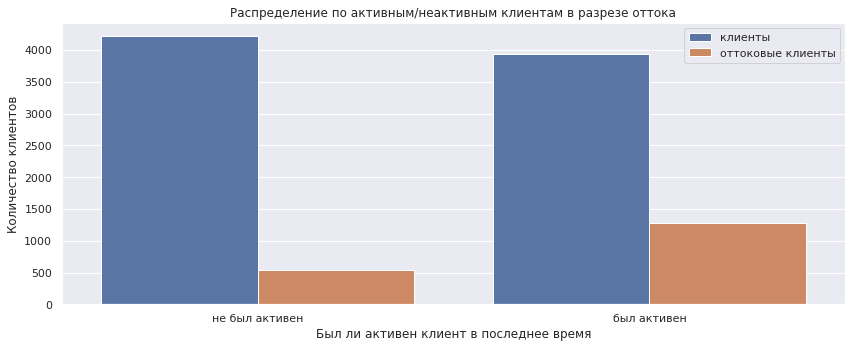

In [46]:
plt.figure(figsize=(12, 5))

sns.countplot(x="last_activity", 
              hue="churn", 
              data=data)

plt.title('Распределение по активным/неактивным клиентам в разрезе оттока')
plt.ylabel('Количество клиентов')
plt.xlabel('Был ли активен клиент в последнее время')
plt.legend(['клиенты', 'оттоковые клиенты'])
plt.xticks([0, 1], ['не был активен', 'был активен'])
plt.tight_layout()
plt.show()

In [47]:
data.groupby('last_activity', as_index=False).agg({'user_id' : 'count'})

,last_activity,user_id
0,0,4758
1,1,5215


In [48]:
last_activity_df = (
    data.pivot_table(
        columns=['last_activity'], 
        values='churn', 
        aggfunc='mean')
    .sort_values(
        'churn', 
        axis=1)
)
last_activity_df

last_activity,0,1
churn,0.113703,0.244871


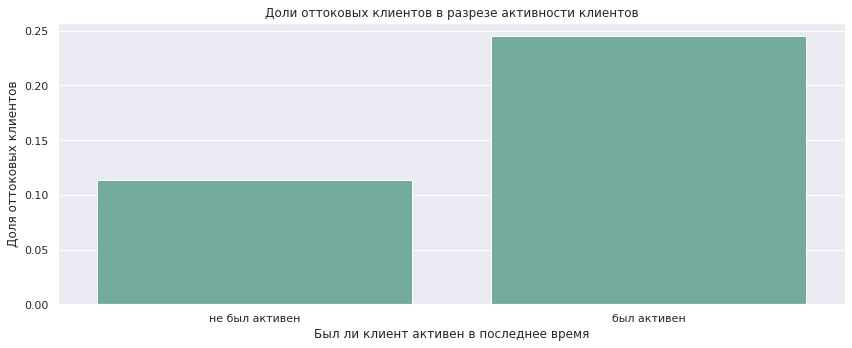

In [49]:
plt.figure(figsize=(12, 5))
sns.barplot(
    data=last_activity_df,  
    color='#69b3a2')

plt.ylabel('Доля оттоковых клиентов')
plt.xlabel('Был ли клиент активен в последнее время')
plt.title('Доли оттоковых клиентов в разрезе активности клиентов')
plt.xticks([0, 1], ['не был активен', 'был активен'])
plt.tight_layout()
plt.show()

**Вывод:**

Среди клиентов, которые были активны в последнее время, доля оттока выше более чем в два, чем среди тех, кто не был активен.

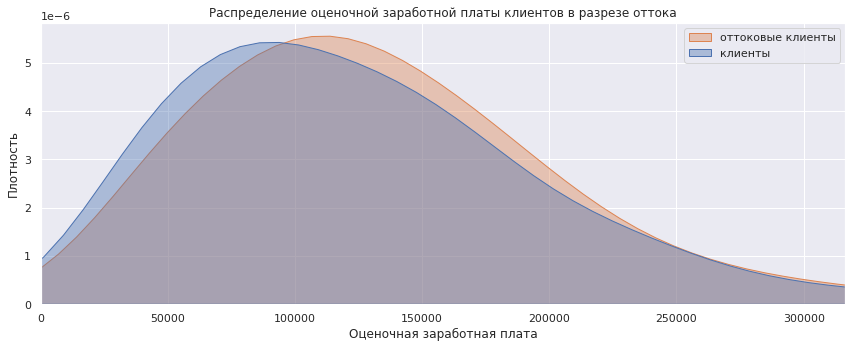

In [50]:
plt.figure(figsize=(12, 5))

sns.kdeplot(data=data, 
            x="est_salary", 
            hue="churn", 
            fill=True, 
            common_norm=False, 
            alpha=0.4)

plt.title('Распределение оценочной заработной платы клиентов в разрезе оттока')
plt.xlabel('Оценочная заработная плата')
plt.ylabel('Плотность')
plt.legend(['оттоковые клиенты', 'клиенты'])
plt.gca().set_xlim(0, 316367)
plt.tight_layout()
plt.show()

**Вывод:**

В основном клиенты зарабатывают `от 30 до 200 тыс`. `95% всех значений находятся в диапазоне от 0 до приблизительно 316 тыс`. Распределение имеет длинный хвост в сторону больших значений. Клиенты, зарабатывающие от `100 тыс. до 230 тыс`., уходят немного чаще.

**Общий вывод:**

1. `Кредитный скоринг:` Большинство клиентов имеют кредитный скоринг в диапазоне `750-950`. Оттоковые клиенты чаще встречаются в диапазоне `820-930`.
2. `География:` Основная концентрация клиентов в `Ярославле`, при этом уровни оттока в `Ярославле и Ростове` схожи, в `Рыбинске` отток несколько ниже.
3. `Пол:` `Мужчины` значительно более склонны к оттоку `(24%)`, чем женщины `(13%)`.
4. `Возраст:` Основная возрастная группа клиентов - `23-70` лет. Клиенты `25-32` лет и особенно `50-60` лет наиболее склонны к оттоку, в то время как клиенты старше `61 года` — наименее.
5. `Оценочная стоимость:` Наблюдается зависимость между оценочной стоимостью и оттоком: `чем выше стоимость, тем выше вероятность оттока`. Клиенты с оценкой `7 и 9` особенно склонны к оттоку.
6. `Баланс на счёте:` Большинство клиентов имеют баланс до `2.1 млн`.  Отток чаще наблюдается среди клиентов с балансом свыше `1 млн`.
7. `Количество продуктов:` Наибольший отток наблюдается среди клиентов, использующих `4 продукта (63%)`, в то время как клиенты с `2 продуктами` показывают низкий уровень оттока, а с `1 продуктом - наименьший`.
8. `Кредитная карта:` Отток среди клиентов без кредитной карты заметно выше `(26%)`, чем среди тех, кто ею пользуется `(15%)`.
9. `Активность:` Активные клиенты показывают более высокий уровень оттока, чем неактивные.
10. `Доход:` Большинство клиентов имеют доход от `30 до 200 тыс`. Отток несколько чаще наблюдается среди клиентов с доходами от `100 тыс. до 230 тыс`.

### Корреляционный анализ

In [51]:
df_corr = data.drop(columns=['user_id', 'missing']).corr()

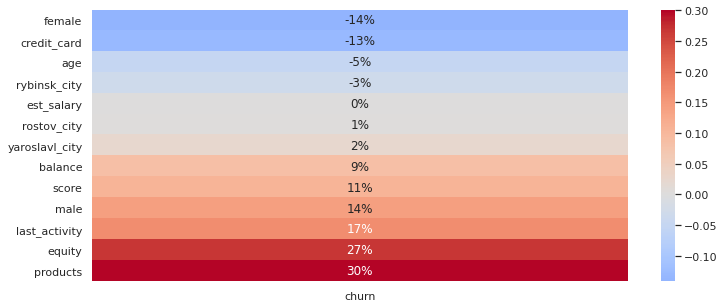

In [52]:
plt.figure(figsize=(12, 5))

sns.heatmap(
    df_corr.loc[:,['churn']]
    .drop('churn')
    .sort_values('churn'), 
    annot=True, fmt='.0%', 
    cmap='coolwarm', 
    center=0)

plt.show()

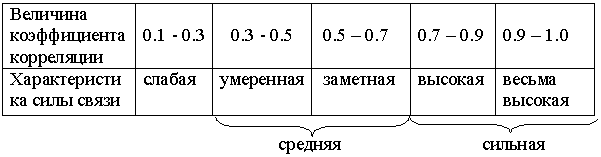

**Вывод:**

Наблюдается `слабая корреляция оттока` с `баллами кредитного скоринга`, `клиентами-мужчинами`, `активностью в последнее время`, `оценкой собственности` и `количеством продуктов`, которыми пользуется клиент. Переменные перечислены по возрастанию уровня корреляции.

### Сравнение портретов типичных клиентов

In [53]:
data_slice = data.loc[:, 'score' : 'churn']
data_churn_false = data_slice.query('churn == 0')
data_churn_true = data_slice.query('churn == 1')

In [54]:
def calculate_stats(df):

    stats_data = []

    for column in df.columns:
        if df[column].apply(type).iloc[0] == str:
            try:
                mode_value = statistics.mode(df[column])
            except statistics.StatisticsError:
                mode_value = None
            stats_data.append({
                'column': column,
                'median': None,
                'mean': None,
                'moda': mode_value
            })
        else:
            stats_data.append({
                'column': column,
                'median': df[column].median(),
                'mean': df[column].mean(),
                'moda': None
            })

    return pd.DataFrame(stats_data).set_index('column')

In [55]:
df_not_churn = calculate_stats(data_churn_false)
df_not_churn = df_not_churn.reset_index()
df_not_churn = df_not_churn.rename(columns={'median' : 'Медиана не отток',
                                            'mean' : 'Среднее не отток',
                                            'moda' : 'Мода не отток'})

df_churn = calculate_stats(data_churn_true)
df_churn = df_churn.reset_index()
df_churn = df_churn.rename(columns={'median' : 'Медиана отток',
                                    'mean' : 'Среднее отток',
                                    'moda' : 'Мода отток'})

df_prof = df_not_churn.merge(df_churn, on='column', how='inner')

In [56]:
df_prof['Относительная разница'] = abs(df_prof['Среднее не отток'] - df_prof['Среднее отток']) / ((df_prof['Среднее не отток'] + df_prof['Среднее отток']) / 2)

In [57]:
df_prof = df_prof.fillna('')
desired_order = ['column', 
                 'Медиана не отток', 
                 'Медиана отток', 
                 'Среднее не отток', 
                 'Среднее отток', 
                 'Относительная разница', 
                 'Мода не отток', 
                 'Мода отток']
df_prof_reordered = df_prof[desired_order]
df_prof_reordered

,column,Медиана не отток,Медиана отток,Среднее не отток,Среднее отток,Относительная разница,Мода не отток,Мода отток
0,score,848.0,866.0,845.396199,863.361936,0.021028,,
1,city,,,,,,Ярославль,Ярославль
2,gender,,,,,,Ж,М
3,age,40.0,39.0,43.020846,41.429593,0.037685,,
4,equity,3.0,4.0,2.378296,3.763476,0.451069,,
5,balance,475410.09,783908.9,733031.630149,1134458.209291,0.42991,,
6,products,2.0,2.0,1.758921,2.377338,0.299022,,
7,credit_card,1.0,1.0,0.70889,0.551705,0.249382,,
8,last_activity,0.0,1.0,0.482894,0.70242,0.37041,,
9,est_salary,118227.6,125408.88,147674.637881,148357.483157,0.004613,,


**Вывод:**

Средний не оттоковый клиент: 
* `женщина` из `Ярославля`, около `40 лет`, 
* около `848 баллов` кредитного скоринга, 
* приблизительная `оценка собственности 3`, 
* баланс на счёте около `730 тыс.`, 
* пользуюется `2 продуктами банка`, 
* имеет кредитную карту, 
* не была активна в последнее время, 
* приблизительный `доход` около `147 тыс`. в месяц.

Средний оттоковый клиент: 
* `мужчина` из `Ярославля`, около `39 лет`, 
* около `866 баллов` кредитного скоринга, 
* приблизительная `оценка собственности — 4`, 
* `баланс` на счёте около `1,1 млн`, 
* пользуется `2 продуктами банка`, 
* имеет кредитную карту, 
* был недавно активен, 
* приблизительный `доход` около `148 тыс.` в месяц.

### Вывод

Склонные к оттоку клиенты имеют в среднем немного большие баллы кредитного скоринга, что указывает на их платёжеспособность. Большинство клиентов находятся в Ярославле, и разница в оттоке по городам незначительна. Мужчины более склонны к оттоку, чем женщины. Активные клиенты чаще уходят, но неясно, является ли активность причиной или следствием. Заметен отток среди клиентов с высокой оценкой собственности и большим количеством продуктов. У склонных к оттоку выше баланс на счёте, но здесь отсутствует прямая корреляция. Также 23% клиентов с высоким доходом и неизвестным балансом менее склонны к оттоку, что также здесь искажает среднюю картину. В целом, к оттоку склонны состоятельные клиенты, которые могут быть недовольны услугами банка.

## Статистический анализ

### Различие дохода между теми клиентами, которые ушли и теми, которые остались

Меры различия для несвязанных выборок позволяют определить различия между двумя несвязанными выборками. Есть два типа методов:

* Параметрические методы (например, t-критерий Стьюдента) требуют метрических данных, близкое к нормальному распределению, большого числа наблюдений и отсутствия выбросов.
* Непараметрические методы (например, U-критерий Манна-Уитни) не зависят от таких условий и позволяют сравнивать две независимые выборки без требования нормального распределения или отсутствия выбросов.

Сформируем гипотезы:

* H0: Различий в доходах между выборками нет

* H1: Различия в доходах между выборками есть

In [58]:
sample1 = data.query('churn == 0')['est_salary'] 
sample2 = data.query('churn == 1')['est_salary']

Проверим гипотезы с помощью t-критерия Стьюдента для независимых выборок.

In [59]:
print(f'среднее первой выборки {np.mean(sample1)}')
print(f'среднее второй выборки {np.mean(sample2)}')

alpha = 0.05

results = st.ttest_ind(sample1, sample2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее первой выборки 147674.63788105457
среднее второй выборки 148357.48315731573
p-value: 0.8500882387258035
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Проверив гипотезы с помощью t-критерия Стьюдента, мы не смогли отвергнуть нулевую гипотезу об отсутствии различия между доходами среди ушедих клиентов и теми, которые остались.

Проверим гипотезы с помощью U-критерий Манна-Уитни.

In [60]:
print(f'среднее первой выборки {np.mean(sample1)}')
print(f'среднее второй выборки {np.mean(sample2)}')

results_u = st.mannwhitneyu(sample1, sample2)

print('p-value:', results_u.pvalue)

if results_u.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее первой выборки 147674.63788105457
среднее второй выборки 148357.48315731573
p-value: 0.00016830729188229058
Отвергаем нулевую гипотезу


**Вывод:**

Проверив гипотезы с помощью t-критерия Стьюдента, мы отвергли нулевую гипотезу об отсутствии различия между доходами среди ушедших клиентов и тех, которые остались. Мы приняли альтернативную гипотезу о наличии различия в доходах между этими группами.

Проверим распределения по критерию согласия Пирсона.

Нулевая гипотеза – данные распределены нормально, альтернативная гипотеза – данные не имеют нормального распределения.

In [61]:
for i in [sample1, sample2]:
    stat, p = st.normaltest(i) 
    print('Statistics=%.3f, p-value=%.3f' % (stat, p))

    if p > alpha:
        print('Принять гипотезу о нормальности')
    else:
        print('Отклонить гипотезу о нормальности')

Statistics=6913.667, p-value=0.000
Отклонить гипотезу о нормальности
Statistics=1611.069, p-value=0.000
Отклонить гипотезу о нормальности


**Вывод:**
    
В обеих выборках данные о зарплатах ненормальны, с длинным хвостом в сторону больших значений. T-критерий Стьюдента неприменим. U-критерий Манна-Уитни показывает наличие статистически значимых различий в доходах, отвергая нулевую гипотезу.

### Различие балов кредитного скоринга между теми клиентами, которые ушли и теми, которые остались

Сформируем гипотезы:

* H0: Различий балов кредитного скоринга между выборками нет

* H1: Различия вбалов кредитного скоринга между выборками есть

Баллы кредитного скоринга распределены близко к нормальному, без выбросов. Для проверки гипотез используем t-критерий Стьюдента.

In [62]:
sample1_sc = data.query('churn == 0')['score'] 
sample2_sc = data.query('churn == 1')['score']

In [63]:
print(f'среднее первой выборки {np.mean(sample1_sc)}')
print(f'среднее второй выборки {np.mean(sample2_sc)}')


results = st.ttest_ind(sample1_sc, sample2_sc)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее первой выборки 845.3961986511342
среднее второй выборки 863.3619361936194
p-value: 2.3562886531110081e-26
Отвергаем нулевую гипотезу


**Вывод:**

Присутствуют статистически значимые различия в баллах кредитного скоринга, поэтому мы отвергаем нулевую гипотезу.

### Различие  долей клиентов, использующих определенное количество продуктов между теми клиентами, которые ушли и теми, которые остались

Для проверки гипотез о равенстве долей, процентов или пропорций используется z-тест для пропорций

Поскольку у нас 5 тестов, мы применим поправку Бонферрони, чтобы минимизировать вероятность ложноположительных результатов при множественных сравнениях.

* H0: Доля клиентов, использующих определенное количество продуктов, среди оттоковых клиентов не отличается от доли таких клиентов среди оставшихся клиентов.
* H1: Доля клиентов, использующих определенное количество продуктов, среди оттоковых клиентов отличается от доли таких клиентов среди оставшихся клиентов.

In [64]:
sample1_pr = data.query('churn == 0')[['products', 'user_id']]
sample2_pr = data.query('churn == 1')[['products', 'user_id']]

In [65]:
sample1_pr = pd.get_dummies(sample1_pr['products'])
sample2_pr = pd.get_dummies(sample2_pr['products'])
sample1_pr_sum = sample1_pr.agg('sum')
sample2_pr_sum = sample2_pr.agg('sum')

In [66]:
sample1_pr = sample1_pr.agg('mean')
sample2_pr = sample2_pr.agg('mean')

In [67]:
for i in sample1_pr.index:
    p1 = sample1_pr[i]
    p2 = sample2_pr[i]
    n1 = sample1_pr_sum[i]
    n2 = sample2_pr_sum[i]
    p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)
    difference = p1 - p2
        
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
    distr = st.norm(0, 1)
        
    p_value = (1 - distr.cdf(abs(z_value))) * 2

        
    print('- * ' * 20)
    print(f'клиенты c {i} продуктом vs оттоковые клиенты c {i} продуктом')
    print(f'p-значение: {p_value:0.3f}')
    if p_value < 0.05 / 5:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

- * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * 
клиенты c 1 продуктом vs оттоковые клиенты c 1 продуктом
p-значение: 0.000
Отвергаем нулевую гипотезу: между долями есть значимая разница
- * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * 
клиенты c 2 продуктом vs оттоковые клиенты c 2 продуктом
p-значение: 0.090
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
- * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * 
клиенты c 3 продуктом vs оттоковые клиенты c 3 продуктом
p-значение: 0.001
Отвергаем нулевую гипотезу: между долями есть значимая разница
- * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * 
клиенты c 4 продуктом vs оттоковые клиенты c 4 продуктом
p-значение: 0.000
Отвергаем нулевую гипотезу: между долями есть значимая разница
- * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * 
клиенты c 5 продуктом vs отт

**Вывод:** 

Мы не смогли отвергнуть только гипотезы о наличии различия долей пользователей среди клиентов и оттоковых клиентов, которые пользуются 2 и 5 продуктами. Тест показал наличие разницы между 1, 3 и 4 продуктами.

### Вывод

В результате проведенного статистического исследования выявлены различия между ушедшими и оставшимися клиентами по двум показателям: доходу и баллам кредитного скоринга. Нулевые гипотезы об отсутствии различий по этим показателям были отвергнуты. 
При анализе различий в долях клиентов между ушедшими и оставшимися клиентами, пользующихся разным количеством банковских продуктов, выявлены значимые различия в группах, использующих 1, 3 и 4 продукта. Однако, гипотезу об отсутствии различий в долях клиентов, использующих 2 и 5 продуктов, отвергнуть не удалось.

## Сегментация

In [68]:
h_segment = ['800 <= score <= 930', 
             '2 < products < 5', 
             'male == "1"', 
             '24 < age < 34', 
             '49 < age < 59', 
             'last_activity == 1', 
             '4 < equity <= 9', 
             '100000 <= est_salary <= 230000', 
             'balance >= 1000000',
             'credit_card == 0']

In [69]:
def c_a(text):
    return 'age' in text

combinations = []

for comb in itertools.combinations(h_segment, 2):
    if not (c_a(comb[0]) and c_a(comb[1])):
        combinations.append(comb)

segments_data = []

for comb in combinations:
    query_str = f"{comb[0]} and {comb[1]}"
    if 300 <= data.query(query_str)['churn'].count() <= 2000 and data.query(query_str)['churn'].mean() >= 0.25:
        segments_data.append({
            'column' : comb,
            'mean' : data.query(query_str)['churn'].mean(),
            'sum' : data.query(query_str)['churn'].sum(),
            'count' : data.query(query_str)['churn'].count()
        })
    
df_segments = pd.DataFrame(segments_data).set_index('column')

In [70]:
df_segments['total_churn_mean'] = df_segments['sum'] / data['churn'].sum()

In [71]:
pd.set_option('display.max_rows', None)

In [72]:
df_segments.sort_values(['sum'], ascending=False).query('count >= 500')

,mean,sum,count,total_churn_mean
column,,,,
"(last_activity == 1, credit_card == 0)",0.350716,612,1745,0.336634
"(800 <= score <= 930, 4 < equity <= 9)",0.333714,584,1750,0.321232
"(800 <= score <= 930, balance >= 1000000)",0.425500,574,1349,0.315732
"(last_activity == 1, balance >= 1000000)",0.521827,514,985,0.282728
"(last_activity == 1, 4 < equity <= 9)",0.438837,513,1169,0.282178
"(100000 <= est_salary <= 230000, balance >= 1000000)",0.433521,463,1068,0.254675
"(100000 <= est_salary <= 230000, credit_card == 0)",0.293666,459,1563,0.252475
"(800 <= score <= 930, 2 < products < 5)",0.427083,451,1056,0.248075
"(800 <= score <= 930, 24 < age < 34)",0.274497,423,1541,0.232673


### Вывод

Выделим три наиболее крупных сегмента с наибольшим процентом оттока, а также наименее похожими переменными.

1) Сегмент недавно активных клиентов с баллами кредитного скоринга от 800 до 930 и балансом более 1 млн. 1349 клиентов и отток примерно 42%

2) Клиент проявлял недавно активность и у него 3-4 продукта банка. 806 клиентов с оттоком примерно 47%

3) Клиент с доходом 100 000-230 000 и балансом больше 1000 000. Таких клиентов 1068 и отток около 43%

## Заключение 

Нашей целью было проанализировать клиентов банка и выделить сегменты, которые склонны уходить. За время работы над проектом мы сделали следующее:

1. Предварительная обработка: Выполнены очистка данных от пропусков (удалены в 'age'), обработка дубликатов (по 'user_id'), кодирование категориальных признаков, удаление выброса, стандартизация названий и типов данных.
2. Исследовательский анализ: Выявлены зависимости оттока от кредитного скоринга, географии, пола, возраста, оценочной стоимости, баланса, количества продуктов, наличия кредитной карты, активности и дохода. Определены основные группы риска оттока.
3. Статистический анализ: Подтверждены статистически значимые различия между ушедшими и оставшимися клиентами по доходу и кредитному скорингу, а также по долям клиентов, использующих 1, 3 и 4 продукта.
4. Сегментация: разделили пользователей на сегменты в зависимости от размера групп и уровня оттока в них.

1. Сегмент недавно активных клиентов с баллами кредитного скоринга от 800 до 930 и балансом более 1 млн (1349 клиентов, отток ~42%):
  *  Рекомендация: Персонализированные предложения и программы лояльности, ориентированные на удержание. Уделить внимание индивидуальным потребностям, так как это клиенты с хорошим скорингом и высокими остатками. Предложить повышенные ставки по депозитам или инвестиционные продукты для удержания баланса.

2. Сегмент клиентов, проявлявших недавно активность и использующих 3-4 продукта банка (806 клиентов, отток ~47%):
  *  Рекомендация: Анализировать причины оттока клиентов, использующих несколько продуктов. Возможно, есть проблемы с удобством использования или тарифами. Упростить и улучшить взаимодействие с продуктами, предлагать пакетные решения.

3. Сегмент клиентов с доходом 100 000-230 000 и балансом более 1 000 000 (1068 клиентов, отток ~43%):
  *  Рекомендация: Предложить премиальное обслуживание и продукты, ориентированные на управление капиталом, включая инвестиционные инструменты и специальные условия по кредитным продуктам. Индивидуальный подход в поддержке и консультировании для удержания.

Общие рекомендации:
*  Мониторинг: Постоянно отслеживать динамику оттока в каждом сегменте и корректировать стратегии удержания.
*  Обратная связь: Активно собирать обратную связь от клиентов для выявления проблемных зон и улучшения сервиса.
*  Персонализация: Усилить персонализацию предложений для каждого сегмента на основе их характеристик и потребностей.